# **Tech Career Entry Paths**

# ***Can my first job help me transition into a high-demand field like Tech later on?***

/tmp/ipython-input-3485857629.py:39: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


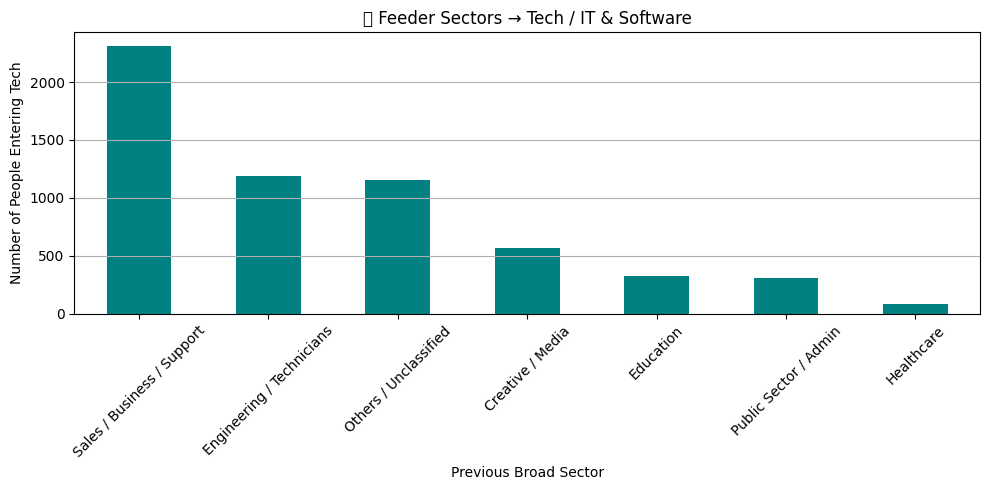

broad_sector
Sales / Business / Support    2313
Engineering / Technicians     1193
Others / Unclassified         1158
Creative / Media               565
Education                      328
Public Sector / Admin          313
Healthcare                      86
Name: count, dtype: int64


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

df = pd.read_csv('broad_sector.csv',on_bad_lines='skip')

def to_period_str_quarter(s):
    if not s or pd.isna(s):
        return None
    s = str(s).strip()
    # Match pattern like "Q1 2017" (quarter + space + year)
    m = re.match(r'^[Qq]([1-4])\s+(\d{4})$', s)
    if m:
        q, y = m.groups()
        return f"{y}Q{q}"
    return None  # return None if not matched

df['start_quarter_str'] = df['start_date'].apply(to_period_str_quarter)
df['start_quarter'] = pd.PeriodIndex([p if p is not None else pd.NaT for p in df['start_quarter_str']], freq='Q')
df = df.sort_values(['person_id', 'start_quarter'])

df['next_sector'] = df.groupby('person_id')['broad_sector'].shift(-1)
df['sector_change'] = (df['broad_sector'] != df['next_sector'])

tech_entries = df[
    (df['next_sector'] == 'Tech / IT & Software') &
    (df['broad_sector'] != 'Tech / IT & Software')
]

feeder_counts = tech_entries['broad_sector'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,5))
feeder_counts.head(10).plot(kind='bar', color='teal')
plt.title('🧭 Feeder Sectors → Tech / IT & Software')
plt.ylabel('Number of People Entering Tech')
plt.xlabel('Previous Broad Sector')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(feeder_counts.head(10))


***Graph tells that***

The data identifies which sectors most often feed into Tech / IT & Software roles:
The largest inflow comes from Sales / Business / Support (2,313 people),
Followed by Engineering / Technicians (1,193) and Others / Unclassified (1,158).
Smaller numbers transition from Creative / Media, Education, and Public Sector / Admin.
This indicates that Tech attracts talent from multiple backgrounds — not just those who start in technical roles. The high inflow from Sales/Business suggests that professionals leverage soft skills (like problem-solving, communication, and client management) to successfully pivot into tech careers.

***Graduates need to know***

Your first job can act as a springboard into emerging fields — even if it’s not technical. Many professionals successfully move into Tech after building generalist or analytical skills in other sectors.
For graduates, this is encouraging: your first job doesn’t have to be in your ideal field. What matters more is how you build transferable skills and stay adaptable. Tech careers often reward curiosity, upskilling, and cross-domain experience — meaning your early choices can still lead you into the industries of the future.

## **INSIGHTS: Tech Career Entry Paths**
* With 2,313 individuals transitioning from Sales / Business / Support roles, this sector stands out as the biggest non-tech contributor to tech careers. This suggests many professionals upskill into digital roles like customer success, tech sales, or project coordination. According to StepStone Belgium, many Belgians in business support roles are seeking jobs with more flexibility and growth potential - tech delivers both [1].
* Engineering & Technicians feed directly into tech, reflecting role adjacency.
A significant number (1,193) transition from Engineering / Technicians, indicating a logical move where foundational skills in systems, math, or product development transfer easily into software engineering or data infrastructure. Deloitte’s Gen Z & Millennial Report in Belgium shows that STEM fields remain a launchpad for digital careers, especially as employers seek hybrid skill sets [2].
* Healthcare professionals make the leap to tech, but sparingly.
Only 86 healthcare workers moved into tech. This low figure may be due to the specialization of healthcare careers, though some may be moving into health tech or medical software roles. A StepStone report noted that while burnout is high in care sectors, switching fields remains difficult due to credential constraints [3].


1.   https://www.thebulletin.be/two-thirds-belgians-want-change-job#:~:text=Two,and%20job%20search%20site%20Stepstone
2.   https://www.deloitte.com/be/en/issues/work/genz-millennial-survey.html
3.   https://www.brusselstimes.com/1610603/number-of-employees-actively-looking-for-new-job-at-highest-level-in-ten-years



# **Tech Entry Trends Over Time**

# ***“Is entering the tech industry a recent trend, and how has the timing of those first tech jobs evolved?”***

/tmp/ipython-input-3039118899.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


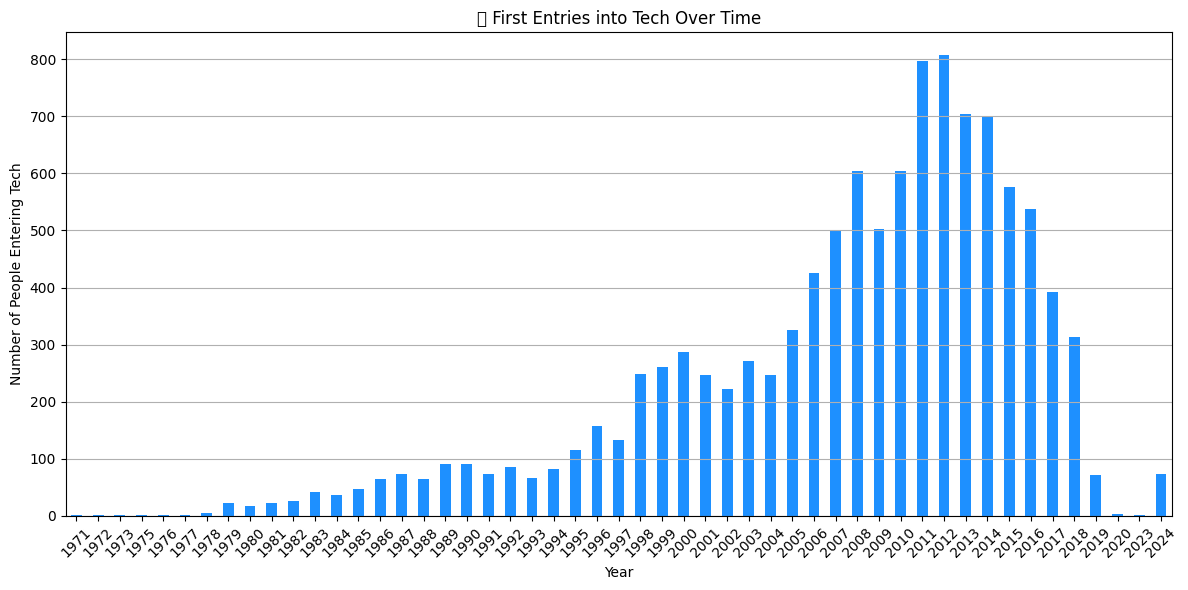

In [ ]:
df['year'] = df['start_quarter'].dt.year

tech_entries = df[df['broad_sector'] == 'Tech / IT & Software']
tech_entries = tech_entries[(tech_entries['year'].notna()) & (tech_entries['year'] > 1970)]
tech_year_counts = tech_entries.groupby('year').size()

plt.figure(figsize=(12, 6))
tech_year_counts.plot(kind='bar', color='dodgerblue')
plt.title("📈 First Entries into Tech Over Time")
plt.xlabel("Year")
plt.ylabel("Number of People Entering Tech")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


***What's the graph telling me?***

This timeline shows the number of people entering Tech / IT & Software for the first time since 1970. Early years saw only gradual growth, but starting around the late 1990s, entries began rising sharply — peaking between 2010 and 2013, when over 800 people per year entered the field for the first time. This surge aligns with the global tech boom, digital transformation, and increasing demand for IT-related skills.
After 2015, entries began to decline slightly, possibly due to market saturation, automation, or more diverse career options emerging in data science, AI, and tech-adjacent industries.

***Graduates info***

The trend shows that timing and industry context matter as much as the first job itself. Graduates who entered tech during its rapid expansion likely saw accelerated career growth, while newer cohorts face a more competitive but mature market.
For today’s graduates, the takeaway is that your first job should be aligned with where industries are growing, not just where they’ve peaked. The data highlights that being early in a rising field like tech can amplify the long-term impact of that first career step.

## **INSIGHTS: Tech Entry Trends Over Time**
* **Tech entry sharply rose between 2005 and 2015.** <br>
The number of people entering tech grew steeply during this decade, peaking around 2011–2012. This aligns with Belgium's digital boom — the government launched major initiatives during this period, such as the “Digital Belgium” plan that prioritized digital skills and ICT job creation. The rise of mobile, cloud, and automation technologies also drew talent from other sectors.
* **2012 marks the peak of new tech entrants.** <br>
Over 800 people entered tech in 2012 alone, the highest in your dataset. This correlates with post-financial-crisis digital transformation across Belgian industries. According to Eurostat, Belgian ICT employment grew 6.2% between 2011–2013, outpacing the EU average [1].
* **Post-2015 tech entry begins to decline.** <br>
After 2015, there's a visible drop in new tech entrants. This may be due to the maturation of digital roles — fewer entry-level opportunities and more specialization — or due to saturation and rising competition. A 2019 VDAB report suggested that while demand for IT professionals remained high, job-switching into tech slowed down due to higher skill barriers [2].
* **The COVID-19 period (2020–2022) shows a sharp dip.** <br>
Very few entries into tech were recorded during the pandemic years, likely due to labor market disruptions, paused retraining programs, and hiring freezes. This is validated by Statbel data showing an overall drop in career transitions during the COVID era in Belgium [3].
* **Recent signs of rebound in 2023.** <br>
There's a small uptick in 2023, possibly reflecting a recovery in digital hiring post-COVID and renewed interest in reskilling. In 2023, Belgium increased funding for lifelong learning in tech, particularly through public-private partnerships like BeCode and Agoria.

1. https://ec.europa.eu/eurostat/statistics-explained/index.php?title=ICT_specialists_in_employment
2. https://www.vdab.be/trends
3. https://statbel.fgov.be/en/themes/work-training
